In [1]:
import cv2 as cv 
import numpy as np
import os
from matplotlib import pyplot as plt

In [2]:
image = cv.imread(os.path.join(os.getcwd(),'noisyImage_SaltPepper_1.jpg'),cv.IMREAD_GRAYSCALE)
print(image.shape)
m,n = image.shape

(512, 512)


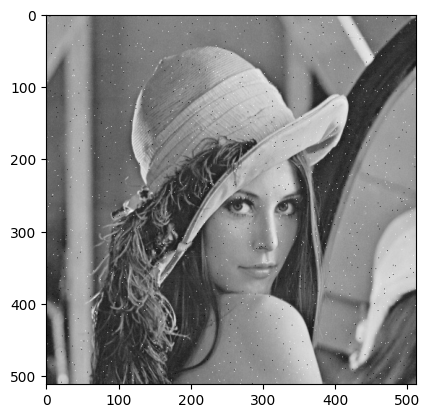

In [4]:
# Our Image
plt.imshow(image,cmap='gray',vmin=0,vmax=255)


In [5]:
# First we will apply Border Replicate Padding 
# Pad upp and down part
top_line = image[0]
bottom_line = image[-1]
image_upper_padding = np.vstack((top_line,top_line,image,bottom_line,bottom_line))

# Pad left and right
left_line = image_upper_padding[:,0]
right_line = image_upper_padding[:,-1]
image_border_padded = np.column_stack((left_line,left_line,image_upper_padding,right_line,right_line))

In [20]:
temp_image = np.zeros((m,n))
for i in range(m):
    for j in range(n):
        all_25_values = image_border_padded[i:i+5,j:j+5].flatten()
        temp_image[i,j]=np.sort(all_25_values)[12]

final_image = temp_image.astype(np.uint8)


Text(0.5, 1.0, 'Difference')

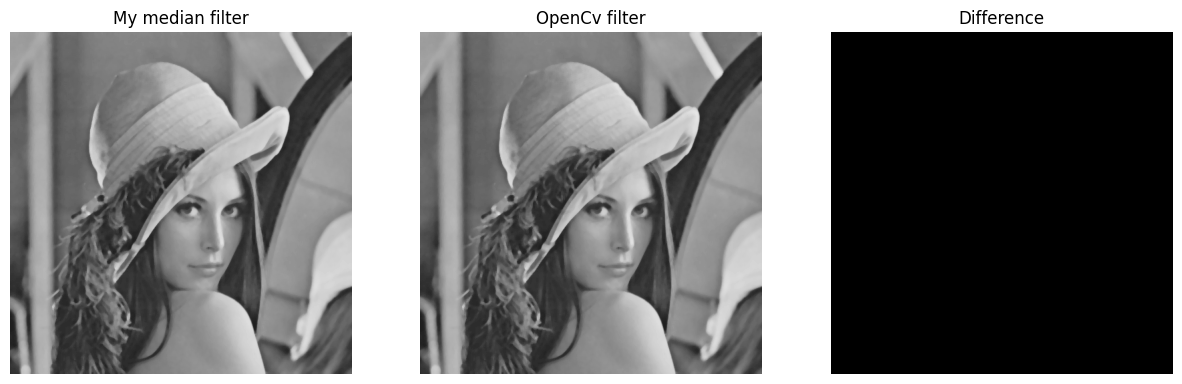

In [34]:
median = cv.medianBlur(image,5)

fig = plt.figure(figsize=(15, 27)) 
  
# setting values to rows and column variables 
rows = 1
columns = 3

  
# Adds a subplot at the 1st position 
fig.add_subplot(rows, columns, 1) 
  
# showing image 
plt.imshow(final_image,cmap='gray',vmin=0,vmax=255)
plt.axis('off') 
plt.title("My median filter") 
  
# Adds a subplot at the 2nd position 
fig.add_subplot(rows, columns, 2) 
  
# showing image 
plt.imshow(median,cmap='gray',vmin=0,vmax=255)
plt.axis('off') 
plt.title("OpenCv filter") 

# Adds a subplot at the 3rd position 
fig.add_subplot(rows, columns, 3) 
  
# showing image 
plt.imshow(median-final_image,cmap='gray',vmin=0,vmax=255)
plt.axis('off') 
plt.title("Difference") 